In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc

import os
import time
import sys

1 -- Spruce/Fir
2 -- Lodgepole Pine
3 -- Ponderosa Pine
4 -- Cottonwood/Willow
5 -- Aspen
6 -- Douglas-fir
7 -- Krummholz

In [4]:
soilsCovDF = pd.read_csv("Data/soilsCovtype.csv")

In [5]:
soilsCovDF

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Cover_Type,SoilType,Soil_Type,code,family,sub-family,description,climatic zone,geologic zone,GeoSoils
0,2596,51,3,258,0,510,221,232,148,6279,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
1,2590,56,2,212,-6,390,220,235,151,6225,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
2,2595,45,2,153,-1,391,220,234,150,6172,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
3,2579,132,6,300,-15,67,230,237,140,6031,...,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
4,2606,45,7,270,5,633,222,225,138,6256,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
5,2605,49,4,234,7,573,222,230,144,6228,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
6,2617,45,9,240,56,666,223,221,133,6244,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
7,2612,59,10,247,11,636,228,219,124,6230,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
8,2610,259,1,120,-1,607,216,239,161,6096,...,5,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1
9,2962,148,16,323,23,5916,240,236,120,3395,...,2,29,29,7745,Como,Legault,extremely stony,subalpine,igneous and metamorphic,1


Text(0.5,1,'Soil Types - All Types')

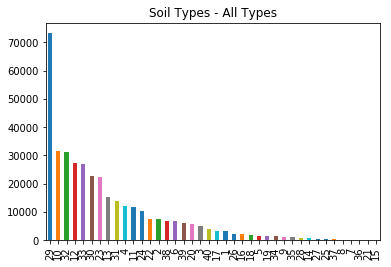

In [6]:
soilsCovDF.Soil_Type.value_counts().plot(kind="bar")
plt.title("Soil Types - All Types")

In [8]:
soilsCovDF.GeoSoils.value_counts()

1    325005
0     44167
Name: GeoSoils, dtype: int64

Text(0.5,1,"Soil Types - 1 is Igneous/Metamorphic - 0 is 'Other'")

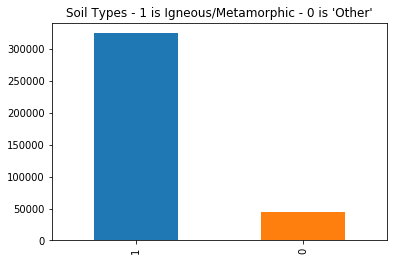

In [12]:
soilsCovDF.GeoSoils.value_counts().plot(kind="bar")
plt.title("Soil Types - 1 is Igneous/Metamorphic - 0 is 'Other'")

Text(0.5,1,"Soil Types - % Where '1' is Igneous/Metamorphic - '0' is 'Other'")

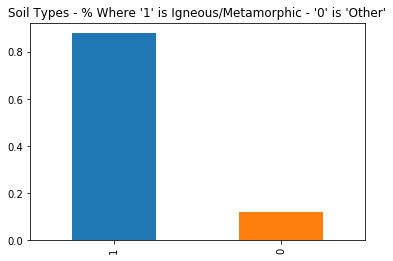

In [14]:
(soilsCovDF.GeoSoils.value_counts() / len(soilsCovDF)).plot(kind="bar")
plt.title("Soil Types - % Where '1' is Igneous/Metamorphic - '0' is 'Other'")

Text(0.5,1,'Tree Cover Types')

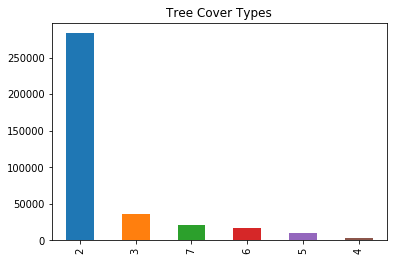

In [15]:
soilsCovDF.Cover_Type.value_counts().plot(kind="bar")
plt.title("Tree Cover Types")

In [10]:
cat_cols = [
    "Cover_Type",
    "GeoSoils",
    "Wilderness_Area1",
    "Wilderness_Area2",
    "Wilderness_Area3", 
    "Wilderness_Area4" 
]

num_cols = [
    "Elevation", 
    "Aspect", 
    "Slope", 
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",  
    "Horizontal_Distance_To_Roadways", 
    "Hillshade_9am",
    "Hillshade_Noon", 
    "Hillshade_3pm", 
    "Horizontal_Distance_To_Fire_Points"
]